In [1]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import folium
import os

In [11]:
notebook_path = os.path.abspath("2. Clustering.ipynb")
notebook_directory = os.path.dirname(notebook_path)

replacement_string = "data\\interim"
index = notebook_directory.find("\\notebooks")
modified_path = notebook_directory[:index]

modified_path += "\\" + replacement_string + "\\" + "combined_data_all_month.csv"

In [12]:
combined_df = pd.read_csv(modified_path, index_col=[0])

In [39]:
columns_for_clustering = ['Lat', 'Lon'] 

# Select the relevant columns for clustering
data_for_clustering = combined_df[columns_for_clustering]

# Standardize the data
# scaler = StandardScaler()
# data_for_clustering_scaled = scaler.fit_transform(data_for_clustering)

In [40]:
K_values = list(range(1,11))

In [43]:
wcss = []
for k in K_values:
    kmeans = MiniBatchKMeans(n_clusters=k)
    kmeans.fit(data_for_clustering)
    wcss.append(kmeans.inertia_) 


c:\Users\Max_G\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Max_G\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\Max_G\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Max_G\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available 

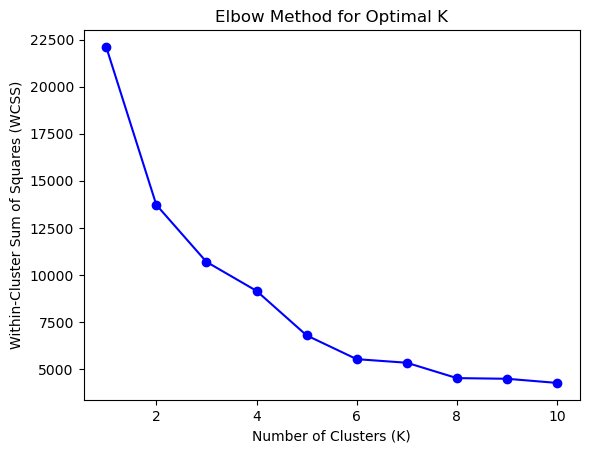

In [44]:
plt.plot(K_values, wcss, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [12]:
# K_values = list(range(2,10))
# sampled_df = combined_df.sample(n=50000, replace=False).sort_index()
# data_for_clustering_sampled = sampled_df[columns_for_clustering]


# silhouette_scores = []
# for k in K_values:
#     kmeans = MiniBatchKMeans(n_clusters=k, batch_size=100)
#     kmeans.fit(data_for_clustering_sampled)
#     labels = kmeans.labels_
#     print(k)
#     silhouette_scores.append(silhouette_score(data_for_clustering_sampled, labels))
#     print(k)


# plt.plot(K_values, silhouette_scores, 'bo-')
# plt.xlabel('Number of Clusters (K)')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score for Optimal K')
# plt.show()


In [45]:
kmeans = MiniBatchKMeans(n_clusters=6, batch_size=100)
kmeans.fit(data_for_clustering)
labels = kmeans.labels_
combined_df['labels'] = labels

c:\Users\Max_G\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Max_G\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [46]:
sample_df_with_labels = combined_df.sample(n=100, replace=False).sort_index()

In [47]:
# Define the color list
color_list = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
              'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
              'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
              'gray', 'black', 'lightgray']

# Create the base map
map = folium.Map(location=sample_df_with_labels[["Lat", "Lon"]].mean().values.tolist())

# Map label values to colors from the color list
add_label = len(color_list)//sample_df_with_labels['labels'].max()
label_to_color = {label: color_list[label*add_label] for label in sample_df_with_labels["labels"]}

# Iterate through the data and add markers with colors based on the labels
for lat, lon, label in zip(sample_df_with_labels["Lat"], sample_df_with_labels["Lon"], sample_df_with_labels["labels"]):
    color = label_to_color[label]
    folium.Marker([lat, lon], popup=label, icon=folium.Icon(color=color)).add_to(map)

# Fit the map to the bounds of the markers
sw = sample_df_with_labels[["Lat", "Lon"]].min().values.tolist()
ne = sample_df_with_labels[["Lat", "Lon"]].max().values.tolist()
map.fit_bounds([sw, ne])


file_name = 'map6.html'
notebook_path = os.path.abspath("2. Clustering.ipynb")
notebook_directory = os.path.dirname(notebook_path)

replacement_string = "reports\\figures\\Maps"
index = notebook_directory.find("\\notebooks")
modified_path = notebook_directory[:index]

modified_path += "\\" + replacement_string + "\\" + file_name

# Save map
map.save(modified_path)

print("Saved map in the current folder as map6.html, to be viewed e.g. via a web browser!")


Saved map in the current folder as map6.html, to be viewed e.g. via a web browser!


In [13]:
file_name = 'combined_month_clustered_6.csv'
notebook_path = os.path.abspath("2. Clustering.ipynb")
notebook_directory = os.path.dirname(notebook_path)

replacement_string = "data\\interim"
index = notebook_directory.find("\\notebooks")
modified_path = notebook_directory[:index]

modified_path += "\\" + replacement_string + "\\" + file_name

In [48]:
# Save the DataFrame to the CSV file in the specified folder
combined_df.to_csv(modified_path, index=True)